In [111]:
from qiskit import *
from qiskit.circuit.library import CHGate
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_distribution
import matplotlib.pyplot as plt, numpy as np

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

# Part 1 - Wigner's Friend:

*Wigner's Friend* is a thought experiment that was first proposed by Eugene Wigner in 1961, a variation of Schrödinger's Cat. In Wigner's Friend, only extended to include **two observers,** one of whom is inside a laboratory and the other outside. Here, Wigner's friend is inside the laboratory and Wigner is outside.

Let's model this system initially using a Plus State Qubit $$\ket{+}=\frac 1{\sqrt 2}(\ket{0}+\ket{1})$$

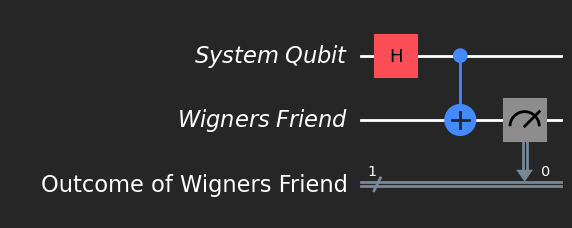

In [112]:
qr_1 = QuantumRegister(1, 'System Qubit')
qr_2 = QuantumRegister(1, 'Wigners Friend')
cr_1 = ClassicalRegister(1, 'Outcome of Wigners Friend')

qc_1 = QuantumCircuit(qr_1, qr_2, cr_1)
qc_1.h(0)
qc_1.cx(0, 1)
qc_1.measure(1, 0)

qc_1.draw('mpl', style = 'iqx-dark')

Wigner's Friend is inside the laboratory, and records the entangled Bell State $$\ket{\phi^+}=\frac 1{\sqrt 2}(\ket{0}+\ket{1})\otimes\ket{0}=\frac 1{\sqrt 2}(\ket{00}+\ket{11})$$ after application of the CNOT Gate.

Wigner's Friend Observes:  {'1': 504, '0': 520}


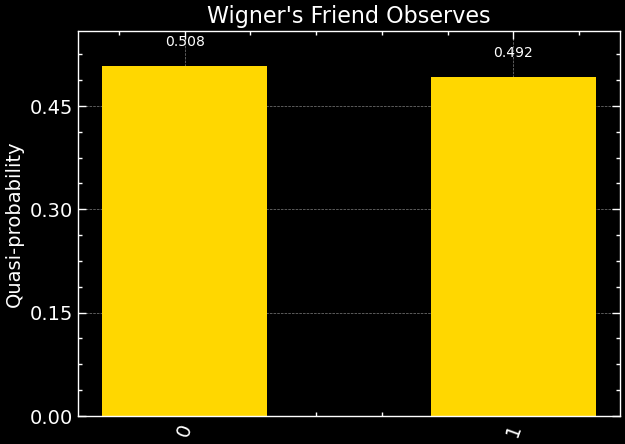

In [113]:
backend = AerSimulator()
result = backend.run(qc_1).result()

print("Wigner's Friend Observes: ", result.get_counts())
plot_distribution(result.get_counts(), title = "Wigner's Friend Observes", color = 'gold')

Until now, Wigner's qubit is isolated, and the entangled state of the system is not known to Wigner. Now, Wigner measures the state of the system, and the state collapses to either $\ket{00}$ or $\ket{11}$. The contradiction is that Wigner's Friend has already measured the state of the system, and the state should have collapsed to $\ket{00}$ or $\ket{11}$ **before** Wigner's measurement. From Wigner's Friend's perspective, the state of the system has already collapsed, but from Wigner's perspective, the state of the system is still in a superposition.

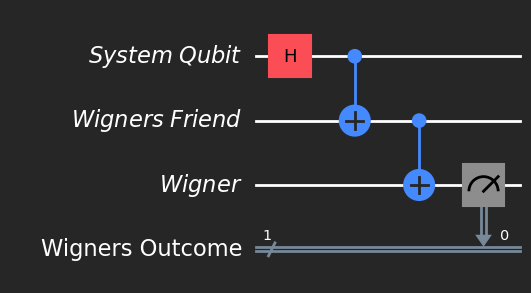

In [114]:
qr_3 = QuantumRegister(1, 'Wigner')
cr_2 = ClassicalRegister(1, 'Wigners Outcome')

qc_2 = QuantumCircuit(qr_1, qr_2, qr_3, cr_2)
qc_2.h(0)
qc_2.cx(0, 1)
qc_2.cx(1, 2)
qc_2.measure(2, 0)

qc_2.draw('mpl', style = 'iqx-dark')

Wigner Observes:  {'1': 519, '0': 505}


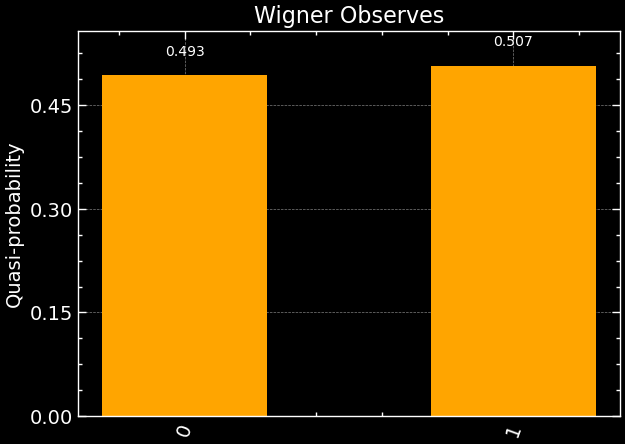

In [115]:
result = backend.run(qc_2).result()

print("Wigner Observes: ", result.get_counts())
plot_distribution(result.get_counts(), title = "Wigner Observes", color = 'orange')

Hence, Wigner also observes that the state of the system has collapsed, and the state of the system is in a superposition from his perspective. This leads to a contradiction, and the question arises: *When does the state of the system collapse?*

### 1. From Wigner's Friend's Perspective:

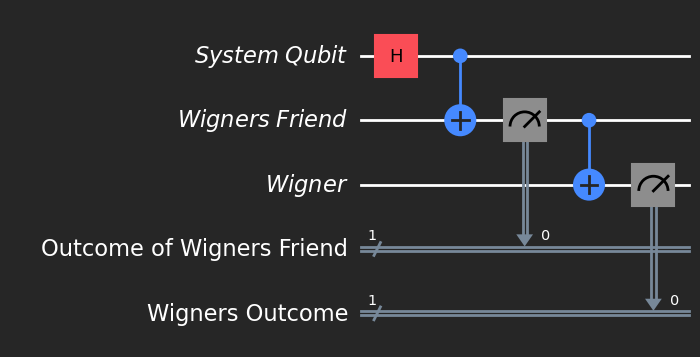

In [116]:
qc_3 = QuantumCircuit(qr_1, qr_2, qr_3, cr_1, cr_2)

qc_3.h(0)
qc_3.cx(0, 1)
qc_3.measure(qr_2, cr_1)
qc_3.cx(1, 2)
qc_3.measure(qr_3, cr_2)

qc_3.draw('mpl', style = 'iqx-dark')

### 2. From Wigner's Perspective:

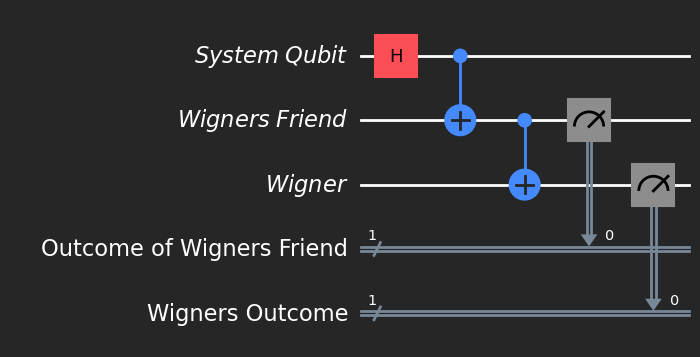

In [117]:
qc_4 = QuantumCircuit(qr_1, qr_2, qr_3, cr_1, cr_2)

qc_4.h(0)
qc_4.cx(0, 1)
qc_4.cx(1, 2)
qc_4.measure(qr_2, cr_1)
qc_4.measure(qr_3, cr_2)

qc_4.draw('mpl', style = 'iqx-dark')

Comparing the two perspectives, they disagree on the positions of the irreverible measurements; whether they occur **before or after** the CNOT Gate operation on Wigner' Friend's Qubit. The *Principle of Third Measurement* in Quantum Computing tells us that this order is indeterminate, and the measurement outcomes are **identical** for both observers:

Wigner's Friend Observes:  {'1 1': 511, '0 0': 513}


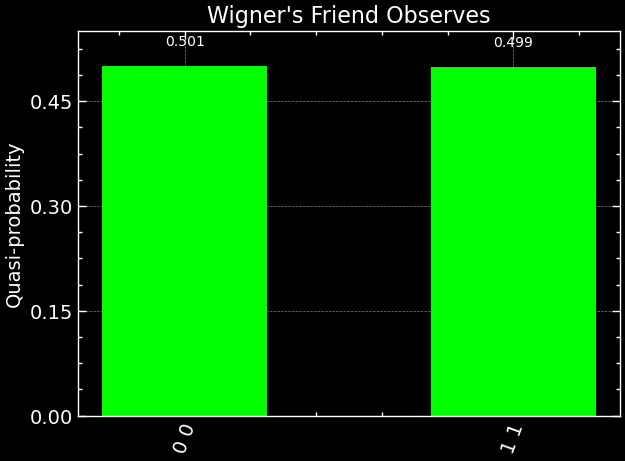

In [118]:
result = backend.run(qc_3).result()

print("Wigner's Friend Observes: ", result.get_counts())
plot_distribution(result.get_counts(), title = "Wigner's Friend Observes", color = 'lime')

Wigner Observes:  {'1 1': 496, '0 0': 528}


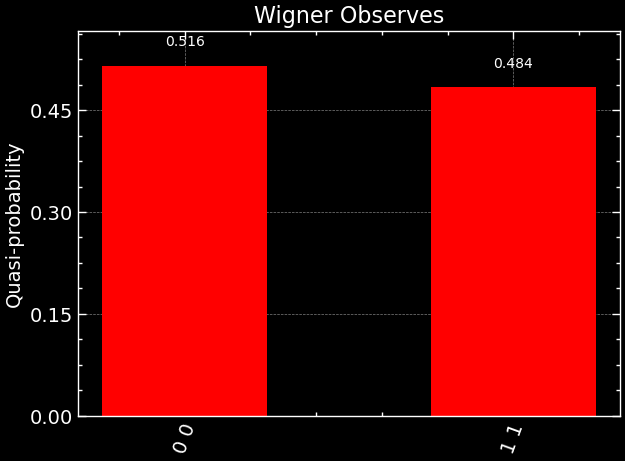

In [119]:
result = backend.run(qc_4).result()

print("Wigner Observes: ", result.get_counts())
plot_distribution(result.get_counts(), title = "Wigner Observes", color = 'red')

Copenhagen's Interpretation of the wavefunction due to its vagueness in defining how measurements are actually made, **cannot suffice** to explain this paradox. The Many-Worlds Interpretation, which states that the wavefunction never collapses, and the wavefunction of the universe is always in a superposition, **also** cannot explain this paradox. The Many-Worlds Interpretation is a deterministic theory, and the paradox is a result of the indeterminacy of the order of measurements.

One potential resolution is getting rid of irreversible measurement operations altogether, treating all measurements as **unitary operations.** This is the basis of the **Quantum Bayesianism** interpretation, which states that the wavefunction is a subjective measure of the observer's knowledge of the system. This interpretation is still under development, and is not widely accepted.

A circuit loosely based on this interpretation follows:

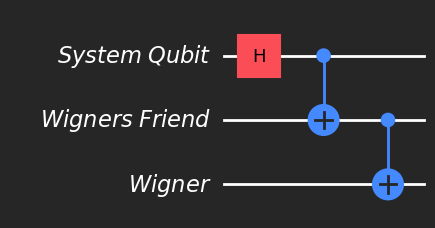

In [120]:
qc_5 = QuantumCircuit(qr_1, qr_2, qr_3)

qc_5.h(0)
qc_5.cx(0, 1)
qc_5.cx(1, 2)

qc_5.draw('mpl', style = 'iqx-dark')

Getting rid of the irreversible measurement operations, we can model the system as a unitary operation on the qubits. The qubits are initialized in the $\ket{+}$ state, and the CNOT Gate is applied to the qubits. The qubits are then measured, and the measurement outcomes are identical for both observers. What results is the state $$\frac 1{\sqrt 2}(\ket{0}+\ket{1})\otimes\ket{0}\otimes\ket{0}=\ket{\phi^+}\otimes\ket{0}=\frac 1{\sqrt 2}(\ket{000}+\ket{111})$$

# Part 2 - Wigner's Friend of a Friend of a Friend:

This paradox, forally called *Frauchiger-Renner's Paradox,* is a variation/extension of Wigner's Friend, and claims to show that quantum theory can't be applied consistently to observers that themselves are in superposition. This vague idea can be simplified by quantum circuits, involving **four** observers who reason about outcomes of measurements, and all of whom disagree with quantum theory:

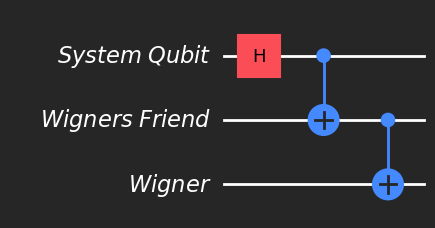

In [121]:
qr_1 = QuantumRegister(1, 'System Qubit')
qr_2 = QuantumRegister(1, 'Wigners Friend')
qr_3 = QuantumRegister(1, 'Wigner')

qc = QuantumCircuit(qr_1, qr_2, qr_3)

qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)

qc.draw('mpl', style = 'iqx-dark')

If observation triggers irreversible collapse, we've seen that Wigner and his first friend will disagree about when it happens, and due to whom. However, if we treat both of them as quantum systems, there're no contradictions, and their measurements each involved entanglement with the System Qubit.

Say Wigner's Friends are Alice and Bob, both of whose states are represented by nonhomogenous superpositions. For Alice, $$\ket{\psi_A}=\bigg[\sqrt\frac 13\ket{0}+\sqrt\frac 23\ket{1}\bigg]\otimes\ket{0}=\sqrt\frac 13\ket{00}+\sqrt\frac 23\ket{11}$$ upon measurement, as there's a 1/3rds chance of measuring $\ket{0}$, and a 2/3rds chance of measuring $\ket{1}$. Next, Alice prepares Bob's qubit based on her measurement outcome, as $$\ket{\psi_B}=\bigg[\sqrt\frac 13\ket{00}+\sqrt\frac 23\ket{11}\bigg]\otimes\ket{0}=\sqrt\frac 13\ket{000}+\sqrt\frac 13\ket{110}+\sqrt\frac 13\ket{111}$$ This operation can be done in our circuit using what's called the *Controlled Hadamard Gate.* Bob then measures his qubit after discussing with Alice:$$\bigg[\sqrt\frac 13\ket{000}+\sqrt\frac 13\ket{110}+\sqrt\frac 13\ket{111}\bigg]\otimes\ket{0}=\sqrt\frac 13\ket{0000}+\sqrt\frac 13\ket{1100}+\sqrt\frac 13\ket{1111}$$

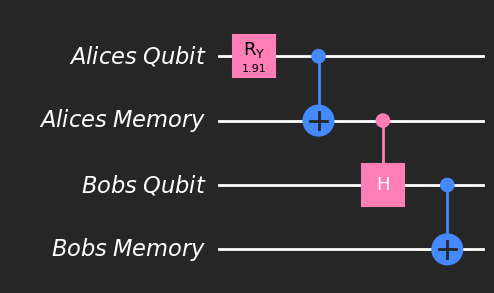

In [122]:
qr_1 = QuantumRegister(1, 'Alices Qubit')
qr_2 = QuantumRegister(1, 'Alices Memory')
qr_3 = QuantumRegister(1, 'Bobs Qubit')
qr_4 = QuantumRegister(1, 'Bobs Memory')

qc = QuantumCircuit(qr_1, qr_2, qr_3, qr_4)

theta = 2 * np.arcsin(np.sqrt(2 / 3))
qc.ry(theta, 0)

qc.cx(0, 1)
qc.ch(1, 2)
qc.cx(2, 3)

qc.draw('mpl', style = 'iqx-dark')

The first gate is a $y$-rotation gate, which rotates the qubit by $\pi/3$ radians. The third gate is a *Controlled Hadamard Gate,* which applies a Hadamard Gate to the second qubit if the first qubit is in the $\ket{1}$ state. Now we need to check if Bob indeed draws a conclusion of $\ket{1}$ based on Alice's measurement:

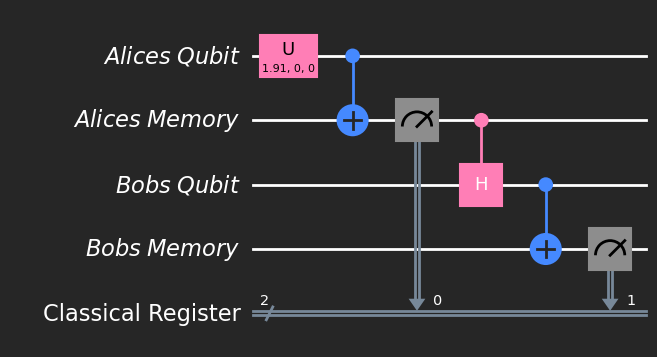

In [123]:
cr = ClassicalRegister(2, 'Classical Register')
qc_ab = QuantumCircuit(qr_1, qr_2, qr_3, qr_4, cr)

qc_ab.u(theta, 0, 0, 0) # Prepare Alice's qubit
qc_ab.cx(0, 1) # Alice measures
qc_ab.measure(1, 0) # Alice sends the result to Bob

qc_ab.ch(1, 2) # Bob applies the CH gate
qc_ab.cx(2, 3) # Bob measures
qc_ab.measure(3, 1) # Bob sends the result to Alice

qc_ab.draw('mpl', style = 'iqx-dark')

In [124]:
backend = AerSimulator()
transpiled_qc_1 = transpile(qc_ab, backend)

result = backend.run(transpiled_qc_1).result()
counts = result.get_counts(transpiled_qc_1)
print('Counts: ', counts)

Counts:  {'01': 360, '00': 338, '11': 326}


If Bob measures a $\ket{1}$, Alice measures a $\ket{1}$ as well, meaning she prepared Bob's qubit in the $\ket{+}$ state. Now if two more friends Charlotte and Danny enter the mix, the paradox becomes more apparent:

Charlotte and Danny are **external** observers with respect to Alice and Bob, and they measure the state of the system **after** Alice and Bob have made their measurements, and are free to do so in whatever bases they desire. Charlotte performs a Bell-Basis measurement $$\ket{\psi_C}=\sqrt\frac 23\ket{\phi^+}\ket{00}+\frac 1{\sqrt 2}\ket{\phi^+}\ket{11}-\frac 1{\sqrt 2}\ket{\phi^-}\ket{11}$$ where the Bell States $$\ket{\phi^\pm}=\frac 1{\sqrt 2}(\ket{00}\pm\ket{11})$$ A Bell-Basis measurement can be performed using a Hadamard and a CNOT Gate in succession:

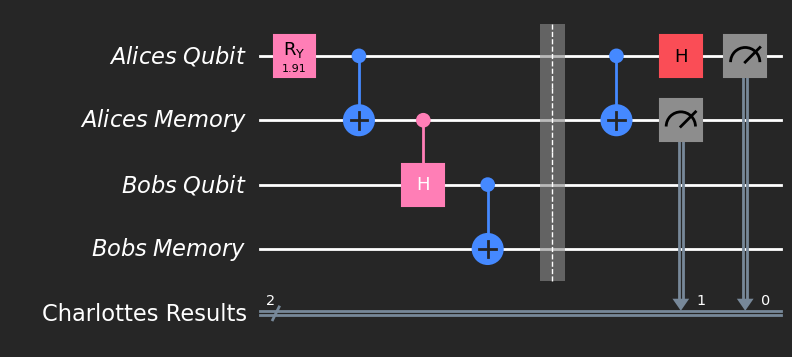

In [125]:
cr_1 = ClassicalRegister(2, 'Charlottes Results')
qc.add_register(cr_1)
qc.barrier()

qc.cx(0, 1)
qc.h(0)

qc.measure(0, 0)
qc.measure(1, 1)

qc.draw('mpl', style = 'iqx-dark')

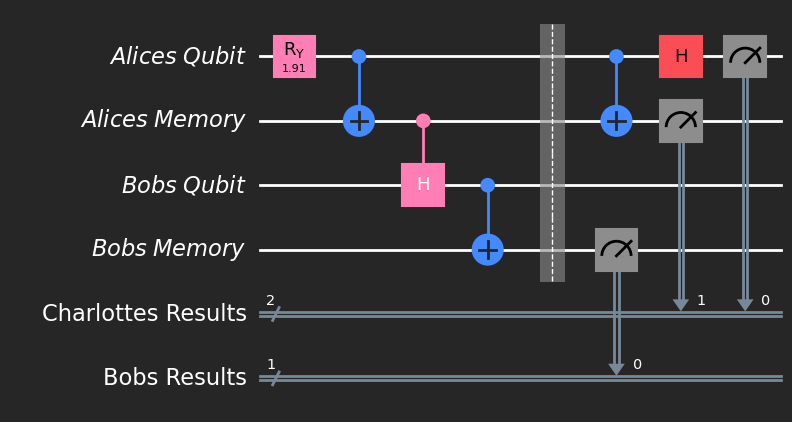

In [126]:
cr_3 = ClassicalRegister(1, 'Bobs Results')

qc_bc = qc.copy()
qc_bc.add_register(cr_3)
qc_bc.measure(3, 2)

qc_bc.draw('mpl', style = 'iqx-dark')

In [127]:
transpiled_qc_2 = transpile(qc_bc, backend)

result = backend.run(transpiled_qc_2).result()
counts = result.get_counts(transpiled_qc_2)

print('Counts: ', counts)

Counts:  {'0 00': 675, '1 01': 177, '1 00': 172}


Indeed, when Charlotte measures $\ket{10}$, Bob measures $\ket{1}$. We reasoned earlier that if Bob measures $\ket{1}$, Alice measures $\ket{1}$ as well. This means that if Charlotte measures $\ket{10}$, Alice measures $\ket{1}$, and if Charlotte measures $\ket{01}$, Alice measures $\ket{0}$. Finally, Danny measures Bob's qubit in the Bell Basis. It's important to stress the fact that there's **no chance** that Charlotte and Danny measure $\ket{\phi^-}$. Let's test this:

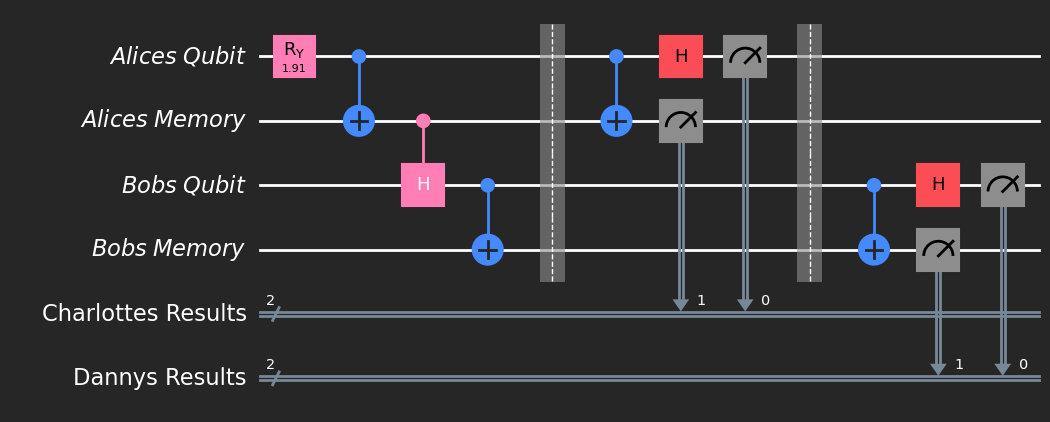

In [128]:
cr_4 = ClassicalRegister(2, 'Dannys Results')
qc.add_register(cr_4)

qc.barrier()
qc.cx(2,3)
qc.h(2)

qc.measure(2, 2)
qc.measure(3, 3)

qc.draw('mpl', style = 'iqx-dark')

We should never expect an outcome of $\ket{0101}$ in this case, as the state of the system is $$\ket{\psi_{CD}}=\sqrt\frac 23\ket{\phi^+}\ket{00}+\frac 1{\sqrt 2}\ket{\phi^+}\ket{11}$$

In [129]:
transpiled_qc_3 = transpile(qc, backend)

result = backend.run(transpiled_qc_3).result()
counts = result.get_counts(transpiled_qc_3)

print('Counts: ', counts)

Counts:  {'01 00': 101, '00 01': 82, '00 00': 755, '01 01': 86}


Turns out that Charlotte and Danny get a signifcant chance of measuring $\ket{0101}$, which is a contradiction. This paradox is a result of the indeterminacy of the order of measurements, and the fact that the wavefunction of the universe is **always** in a superposition. The Global Statevector is given by $$\ket{\psi_{ABCD}}=\sqrt\frac 34\ket{\phi^+\phi^+}+\frac 1{\sqrt{12}}\ket{\phi^+\phi^-}-\frac 1{\sqrt{12}}\ket{\phi^-\phi^+}+\frac 1{\sqrt{12}}\ket{\phi^-\phi^-}$$ telling us that the state $\ket{\phi^-}$ is **not** impossible, and has a significant chance of being measured.

To avoid the paradox, Frauchiger and Renner propose that the wavefunction of the universe collapses **only** when all observers agree on the outcome of the measurement. This is a **very** strong assumption, and is not widely accepted. The Quantum Bayesianism interpretation, which states that the wavefunction is a subjective measure of the observer's knowledge of the system, is still under development, and is not widely accepted.